<a href="https://colab.research.google.com/github/anujsaxena/Python/blob/main/ML_TUT_3_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Naive** Bayes Classifier

Naive Bayes is a statistical classification technique based on Bayes Theorem. It is one of the simplest supervised learning algorithms. Naive Bayes classifier calculates the probability of an event in the following steps:

Step 1: Calculate the prior probability for given class labels

Step 2: Find Likelihood probability with each attribute for each class

Step 3: Put these value in Bayes Formula and calculate posterior probability.

Step 4: See which class has a higher probability, given the input belongs to the higher probability class.

Equation

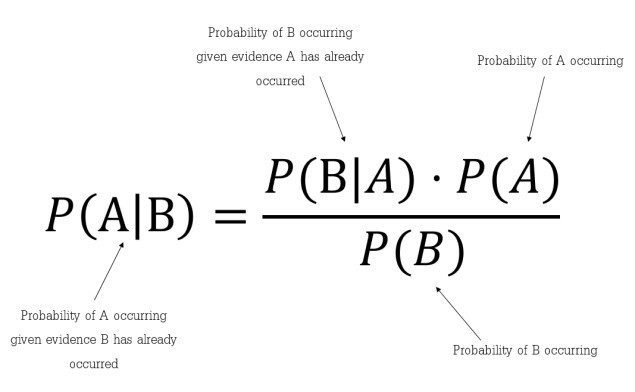

Which tells us: how often A happens given that B happens, written P(A|B) also called posterior probability, When we know: how often B happens given that A happens, written P(B|A) and how likely A is on its own, written P(A) and how likely B is on its own, written P(B).

Let us understand with an example

In [ ]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']


In this example the data is in string form, we will have to convert it into numbers using label encoder. 

The LabelEncoder package in Scikit-learn is used to encode labels with a value between 0 and one less than the number of distinct classes.

Here distinct classes are:
1. Sunny, Overcat, and Rainy (will be labelled 0,1,2)
2. Hot, Mild, and Cold (will be labelled 0,1,2)

In [ ]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


Encode temp and play also

In [ ]:
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print(temp_encoded)
print(label)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


Now we have to join weather and temperature. They will act as the features.

In [ ]:
import numpy as np
#Combinig weather and temp into a tuple
features=zip(weather_encoded,temp_encoded)
print(features)
features=list(features)
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


# **Generate Model**
Use the following steps:

1. Create naive bayes classifier
2. Fit the dataset on classifier
3. Perform prediction

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
pre= ['No','Yes']
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[2,1]]) # 2:Sunny, 1:Hot
print("Predicted value:",predicted)
p=(predicted[0])
print("Can I play ? ",pre[p])

Predicted value: [0]
Can I play ?  No


# **Now Multiple Labels**
Let us load a wine datset to understand it

In [ ]:
from sklearn import datasets
wine = datasets.load_wine()
#Features of the data set
print(wine)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [ ]:
print(wine.target_names)
print(wine.feature_names)


['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [ ]:
#check the shape
print(wine.data.shape)


(178, 13)


In [ ]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


# **Now split the data**

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) 

In [ ]:
print(X_train)


[[1.323e+01 3.300e+00 2.280e+00 ... 5.600e-01 1.510e+00 6.750e+02]
 [1.384e+01 4.120e+00 2.380e+00 ... 5.700e-01 1.640e+00 4.800e+02]
 [1.220e+01 3.030e+00 2.320e+00 ... 6.600e-01 1.830e+00 5.100e+02]
 ...
 [1.362e+01 4.950e+00 2.350e+00 ... 9.100e-01 2.050e+00 5.500e+02]
 [1.336e+01 2.560e+00 2.350e+00 ... 7.000e-01 2.470e+00 7.800e+02]
 [1.439e+01 1.870e+00 2.450e+00 ... 1.020e+00 3.580e+00 1.290e+03]]


In [ ]:
print(y_train)

[2 2 2 2 1 0 2 1 2 1 1 0 1 0 2 2 1 1 0 1 0 1 2 1 2 0 0 0 1 0 0 2 1 2 1 1 2
 0 1 2 1 0 0 2 1 0 2 1 1 0 1 1 2 1 1 1 0 2 0 1 1 0 1 1 1 1 2 1 1 1 1 0 0 0
 1 1 2 2 1 1 0 1 2 2 1 2 2 1 1 2 2 2 0 0 0 0 0 1 1 1 0 2 0 1 2 0 0 1 0 1 1
 2 1 2 0 0 0 1 0 0 1 2 2 0]


## **Generate the model**

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)
print(y_pred)

[0 0 1 2 0 1 0 0 1 0 2 2 2 2 0 1 1 0 0 1 2 1 0 2 0 0 1 2 0 1 2 1 1 0 1 1 0
 2 2 0 2 1 0 0 0 2 2 0 1 1 2 0 0 2]


# **Calculate accuracy of the model**

In [ ]:
#Import scikit-learn metrics module to calculate the accuracy
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("NB Accuracy:",metrics.accuracy_score(y_test, y_pred))

NB Accuracy: 0.9074074074074074


# **Advantages**
1. It is not only a simple approach but also a fast and accurate method for prediction.
2. Naive Bayes has very low computation cost.
3. It can efficiently work on a large dataset.
4. It performs well in case of discrete response variable compared to the continuous variable.
5. It can be used with multiple class prediction problems.
6. It also performs well in the case of text analytics problems.
7. When the assumption of independence holds, a Naive Bayes classifier performs better compared to other models like logistic regression.

# **Disadvantages**
1. The assumption of independent features. In practice, it is almost impossible that model will get a set of predictors which are entirely independent.
2. If there is no training tuple of a particular class, this causes zero posterior probability. In this case, the model is unable to make predictions. This problem is known as Zero Probability/Frequency Problem.